# Continuous learning from a trained hyperbox-based model

This example shows how to perform a continuous learning ability for a trained hyperbox-based model.

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

### Load training and testing datasets 

In this example, we create two training datasets. One data set is used to trained a model and store it to the data storage. The other data set is used to continously train the stored model after reloading that trained model.

In [3]:
from sklearn.model_selection import StratifiedKFold

In [4]:
# Get the path to the this jupyter notebook file
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\other_learning_ability_gfmm'

In [5]:
# Get the home folder of the hyperbox-brain toolbox
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

In [6]:
# Create the path to the training and testing files
training_file = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
testing_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))

In [7]:
# Create training and testing data sets
df_train = pd.read_csv(training_file, header=None)
df_test = pd.read_csv(testing_file, header=None)

Xy_train = df_train.to_numpy()
Xy_test = df_test.to_numpy()

Xtr = Xy_train[:, :-1]
ytr = Xy_train[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

In [8]:
# Split the existing training set into two training sets
skf = StratifiedKFold(n_splits=2)
for train1_index, train2_index in skf.split(Xtr, ytr):
    X_tr1, X_tr2 = Xtr[train1_index], Xtr[train2_index]
    y_tr1, y_tr2 = ytr[train1_index], ytr[train2_index]

This example shows how to continue to train a deployed model. This example will use an incremental learning algorithm and an agglomerative learning algorithm without retraining from scratch for demonstration.

### 1. Training a General fuzzy min-max neural network model using an incremental learning algorithm

In [9]:
from hbbrain.numerical_data.incremental_learner.onln_gfmm import OnlineGFMM

In [10]:
# Initializing parameters
theta = 0.1
theta_min = 0.1
gamma = 1
is_draw = False

In [11]:
onln_gfmm_clf = OnlineGFMM(theta=theta, theta_min=theta_min, gamma=gamma, is_draw=is_draw)
onln_gfmm_clf.fit(X_tr1, y_tr1)

OnlineGFMM(C=array([1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2]),
           V=array([[0.42413   , 0.53516   ],
       [0.70577   , 0.39146   ],
       [0.82785   , 0.78025   ],
       [0.6416    , 0.4824875 ],
       [0.48794   , 0.672     ],
       [0.26651   , 0.18424   ],
       [0.32527   , 0.60393   ],
       [0.19944   , 0.03      ],
       [0.29343   , 0.28975   ],
       [0.63683   , 0.6936    ],
       [0.32782   , 0.55997   ],
       [0.03      , 0.47757   ],
       [0.54181   , 0.43986   ],
       [0.73368   , 0.2170...
       [0.49255   , 0.43164   ],
       [0.81877   , 0.51294   ],
       [0.4713    , 0.77996   ],
       [0.25281   , 0.41059   ],
       [0.25858   , 0.30637   ],
       [0.3378    , 0.451095  ],
       [0.68354   , 0.41653   ],
       [0.34544   , 0.85954   ],
       [0.59061   , 0.62471   ],
       [0.68628   , 0.65662   ],
       [0.14324   , 0.47785   ],
       [0.41517   ,

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


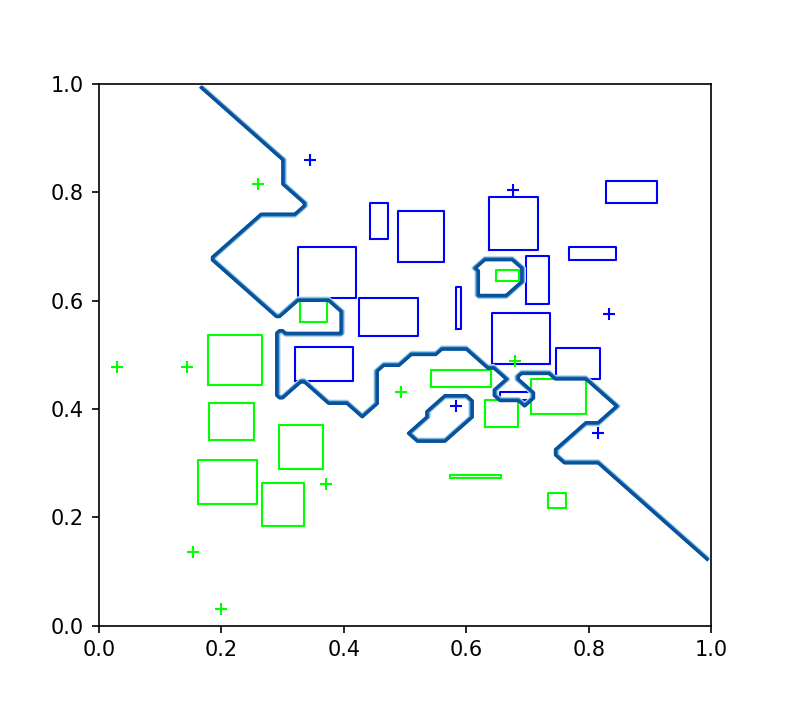

In [12]:
onln_gfmm_clf.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

In [13]:
print("Number of hyperboxes = ", onln_gfmm_clf.get_n_hyperboxes())

Number of hyperboxes =  39


#### Make prediction

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
y_pred = onln_gfmm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  86.40%


#### Store the trained model

In [16]:
from hbbrain.utils.model_storage import store_model

In [17]:
store_model(onln_gfmm_clf, "store_cont_model.dummy")

#### Reload the trained model and make prediction

In [18]:
from hbbrain.utils.model_storage import load_model

In [19]:
trained_onln_gfmm_clf = load_model("store_cont_model.dummy")

In [20]:
y_pred_trained_model = trained_onln_gfmm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred_trained_model)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  86.40%


#### Continue to train the deployed model using another training set

In [21]:
trained_onln_gfmm_clf.fit(X_tr2, y_tr2)

OnlineGFMM(C=array([1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1]),
           V=array([[0.42413   , 0.53516   ],
       [0.70577   , 0.397105  ],
       [0.82785   , 0.78025   ],
       [0.66038   , 0.51128   ],
       [0.48794   , 0.672     ],
       [0.26651   , 0.18424   ],
       [0.32289   , 0.60194   ],
       [0.19944   , 0.03      ],
       [0.29343   , 0.28975   ],
       [0.63683   , 0.6936    ],
       [0.32906   , 0.55512   ],
       [0.03      , 0.47757   ],
       [0.54...
       [0.25929   , 0.81558   ],
       [0.815     , 0.397095  ],
       [0.67906   , 0.83605   ],
       [0.37033   , 0.26124   ],
       [0.66037   , 0.57837   ],
       [0.52197   , 0.91371   ],
       [0.52621   , 0.66846   ],
       [0.80583   , 0.43242   ],
       [0.79935   , 0.7757    ],
       [0.35813   , 0.58772   ],
       [0.79516   , 0.32629   ],
       [0.70743  

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


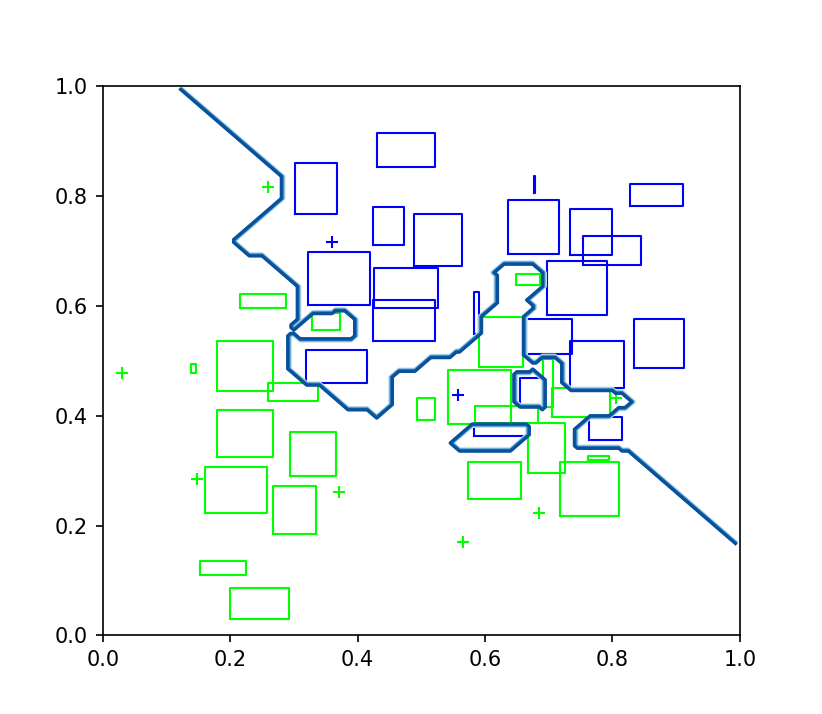

In [22]:
trained_onln_gfmm_clf.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

In [23]:
print("Number of hyperboxes = ", trained_onln_gfmm_clf.get_n_hyperboxes())

Number of hyperboxes =  53


#### Make prediction

In [24]:
y_pred = trained_onln_gfmm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  84.50%


### 2. Training a General fuzzy min-max neural network model using an agglomerative learning algorithm

In [26]:
from hbbrain.numerical_data.batch_learner.agglo_gfmm import AgglomerativeLearningGFMM

In [27]:
# Initialise parameters
theta = 0.2
gamma = 1
min_simil = 0
simil_measure = 'long'
is_draw = False

In [28]:
agglo_sm_clf = AgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)
agglo_sm_clf.fit(X_tr1, y_tr1)

AgglomerativeLearningGFMM(min_simil=0, simil_measure='long', theta=0.2)

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


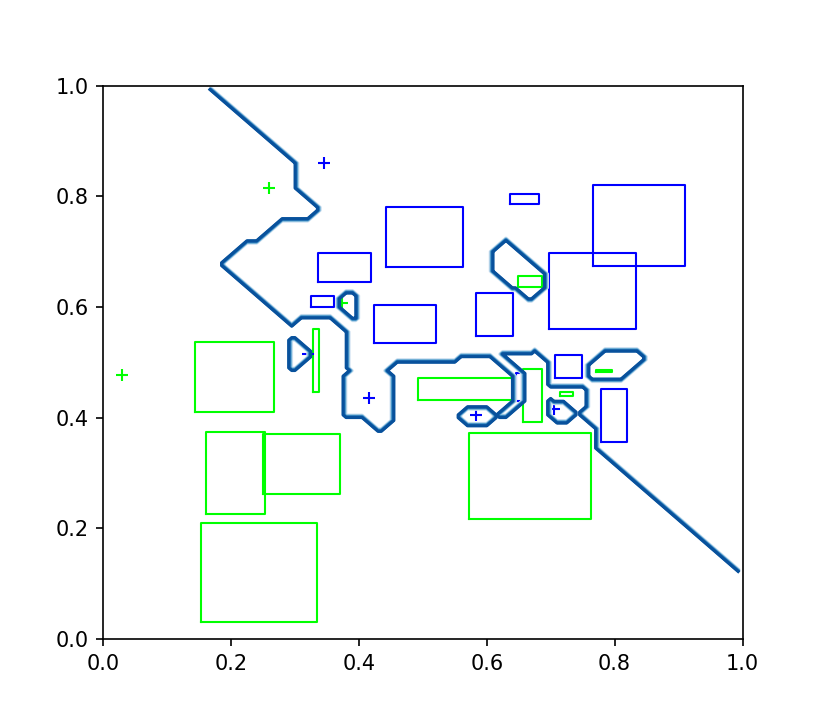

In [29]:
agglo_sm_clf.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

In [30]:
print("Number of hyperboxes = ", agglo_sm_clf.get_n_hyperboxes())

Number of hyperboxes =  30


#### Make prediction

In [31]:
y_pred_agglosm = agglo_sm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred_agglosm)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  84.90%


#### Store the trained model

In [32]:
store_model(agglo_sm_clf, "store_agglosm_model.dummy")

#### Reload the trained model and make prediction

In [33]:
trained_agglo_sm_clf = load_model("store_agglosm_model.dummy")

In [34]:
y_pred_trained_agglosm_model = trained_agglo_sm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred_trained_agglosm_model)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  84.90%


#### Continue to train the deployed model using another training set

In [35]:
trained_agglo_sm_clf.fit(X_tr2, y_tr2)

AgglomerativeLearningGFMM(min_simil=0, simil_measure='long', theta=0.2)

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


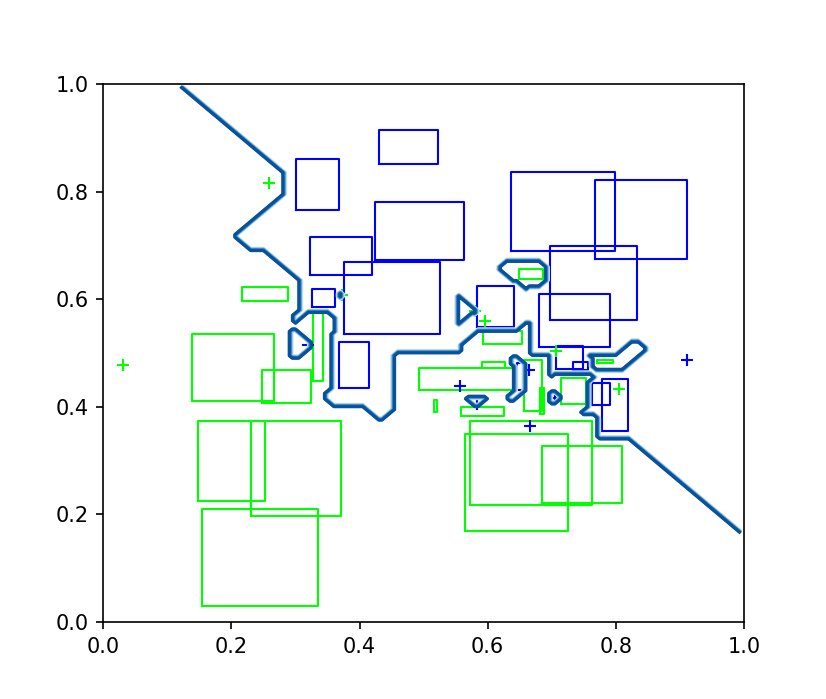

In [36]:
trained_agglo_sm_clf.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

In [37]:
print("Number of hyperboxes = ", trained_agglo_sm_clf.get_n_hyperboxes())

Number of hyperboxes =  51


#### Make prediction

In [38]:
y_pred_agglosm = trained_agglo_sm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred_agglosm)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  87.90%
